In [2]:
import pandas as pd

df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')
print(df.head())
print(df.info())
print(df.columns)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [3]:
df.isnull().sum()
df = df.dropna()

In [5]:
df.columns = df.columns.str.lower().str.strip()

In [10]:
numeric_cols = [
    'subscribers', 'video views',
    'video_views_for_the_last_30_days',
    'lowest_monthly_earnings',
    'highest_monthly_earnings',
    'lowest_yearly_earnings',
    'highest_yearly_earnings',
    'subscribers_for_last_30_days',
    'population'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df = df.dropna(subset=['category', 'country'])

Category Analysis:

In [12]:
category_views = df.groupby('category')['video views'].mean().sort_values(ascending=False)
print(category_views.head(10))

category
Shows               3.649209e+10
Education           1.850653e+10
Music               1.761279e+10
Trailers            1.663136e+10
Sports              1.467566e+10
Film & Animation    1.392843e+10
Entertainment       1.250668e+10
Pets & Animals      1.163421e+10
People & Blogs      1.060340e+10
News & Politics     1.014079e+10
Name: video views, dtype: float64


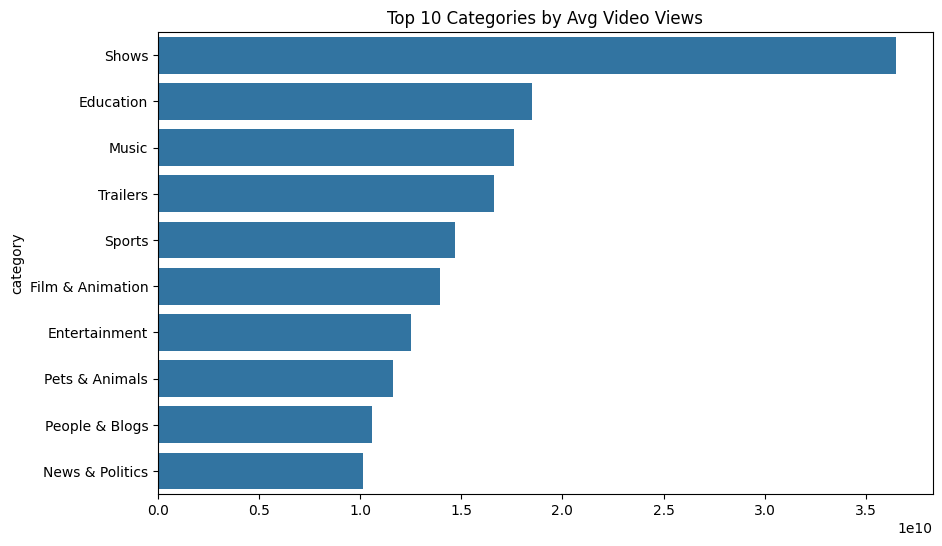

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

top_cat = category_views.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cat.values, y=top_cat.index)
plt.title("Top 10 Categories by Avg Video Views")
plt.show()

Country-Level Analysis :

In [14]:
country_subs = df.groupby('country')['subscribers'].mean().sort_values(ascending=False)
print(country_subs.head(10))

country
Cuba           4.630000e+07
El Salvador    4.610000e+07
Barbados       4.190000e+07
South Korea    4.057500e+07
Pakistan       3.247500e+07
Venezuela      3.120000e+07
Canada         3.101667e+07
Kuwait         3.050000e+07
Chile          2.906667e+07
India          2.753957e+07
Name: subscribers, dtype: float64


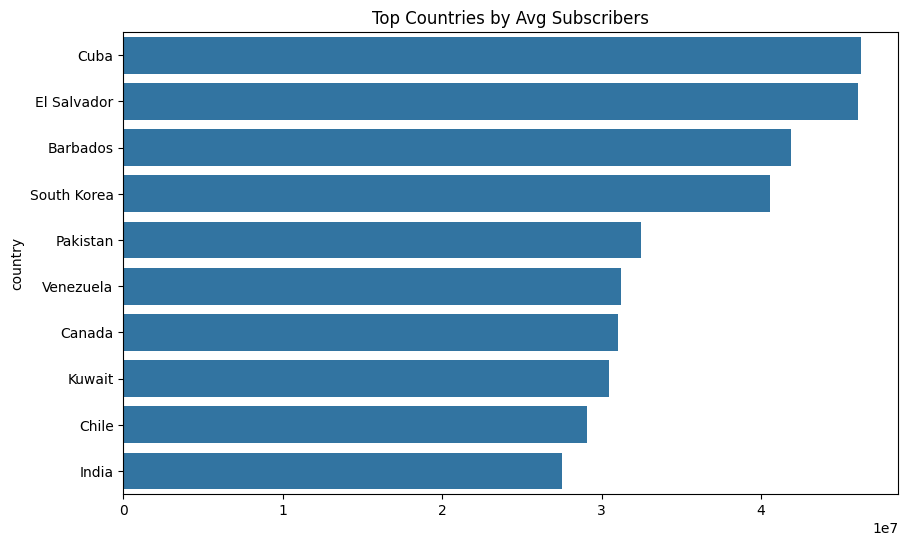

In [15]:
top_country = country_subs.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_country.values, y=top_country.index)
plt.title("Top Countries by Avg Subscribers")
plt.show()

Growth Analysis :

In [16]:
growth = df.sort_values(by='subscribers_for_last_30_days', ascending=False)

growth[['youtuber', 'country', 'subscribers_for_last_30_days']].head(10)

,youtuber,country,subscribers_for_last_30_days
2,MrBeast,United States,8000000.0
417,DaFuq!?Boom!,United States,6700000.0
117,Jess No Limit,Indonesia,5500000.0
0,T-Series,India,2000000.0
212,PANDA BOI,Italy,2000000.0
129,Ricis Official,Indonesia,1900000.0
323,Topper Guild,United States,1900000.0
153,TheDonato,Argentina,1900000.0
40,Infobells - Hindi,India,1600000.0
344,Ishaan Ali 11,India,1600000.0


In [17]:
views_growth = df.sort_values(by='video_views_for_the_last_30_days', ascending=False)

views_growth[['youtuber', 'country', 'video_views_for_the_last_30_days']].head(10)

,youtuber,country,video_views_for_the_last_30_days
286,Happy Lives,United States,6.589000e+09
455,Dan-Sa / Daniel Saboya,Brazil,6.148000e+09
417,DaFuq!?Boom!,United States,2.304000e+09
902,Calon Sarjana,Indonesia,2.292000e+09
0,T-Series,India,2.258000e+09
3,Cocomelon - Nursery Rhymes,United States,1.975000e+09
4,SET India,India,1.824000e+09
21,Zee TV,India,1.707000e+09
139,StarPlus,India,1.667000e+09
15,Sony SAB,India,1.657000e+09


Earnings Analysis :

In [18]:
earnings = df.groupby('category')['highest_yearly_earnings'].mean().sort_values(ascending=False)
print(earnings.head(10))

category
Shows               2.641667e+07
Autos & Vehicles    1.315000e+07
Comedy              1.290128e+07
Pets & Animals      1.276667e+07
Sports              1.130841e+07
Entertainment       1.111809e+07
Film & Animation    1.092551e+07
Education           1.071951e+07
Music               9.941155e+06
News & Politics     9.290476e+06
Name: highest_yearly_earnings, dtype: float64


In [19]:
df[['subscribers','highest_yearly_earnings']].corr()

,subscribers,highest_yearly_earnings
subscribers,1.000000,0.534721
highest_yearly_earnings,0.534721,1.000000


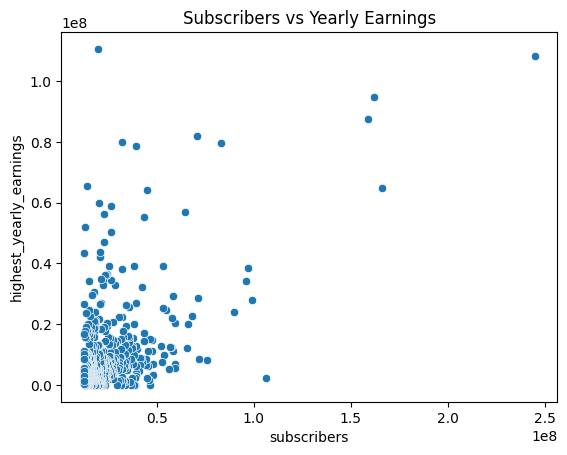

In [20]:
sns.scatterplot(data=df, x='subscribers', y='highest_yearly_earnings')
plt.title("Subscribers vs Yearly Earnings")
plt.show()

In [29]:
import sqlite3

conn = sqlite3.connect("youtube.db")
df.to_sql("youtube_data", conn, if_exists="replace", index=False)

554

In [32]:
import pandas as pd

query = """
SELECT category,
ROUND(AVG("video views"),2) AS avg_views
FROM youtube_data
GROUP BY category
ORDER BY avg_views DESC
"""

result = pd.read_sql_query(query, conn)
result

,category,avg_views
0,Shows,3.649209e+10
1,Education,1.850653e+10
2,Music,1.761279e+10
3,Trailers,1.663136e+10
4,Sports,1.467566e+10
5,Film & Animation,1.392843e+10
6,Entertainment,1.250668e+10
7,Pets & Animals,1.163421e+10
8,People & Blogs,1.060340e+10
9,News & Politics,1.014079e+10


In [35]:
query="""SELECT  country,
    ROUND(AVG(subscribers),2) AS avg_subscribers,
    RANK() OVER (ORDER BY AVG(subscribers) DESC) AS rank_position
FROM youtube_data
GROUP BY country
ORDER BY avg_subscribers DESC;"""
result = pd.read_sql_query(query, conn)
result

,country,avg_subscribers,rank_position
0,Cuba,46300000.00,1
1,El Salvador,46100000.00,2
2,Barbados,41900000.00,3
3,South Korea,40575000.00,4
4,Pakistan,32475000.00,5
5,Venezuela,31200000.00,6
6,Canada,31016666.67,7
7,Kuwait,30500000.00,8
8,Chile,29066666.67,9
9,India,27539568.35,10


In [36]:
df.to_csv("cleaned_youtube_channel_data.csv", index=False)